In [1]:
# !pip install matplotlib

In [2]:
import pandas as pd
from nltk.tokenize import word_tokenize
import string
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('spam.csv')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.dropna(axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [8]:
df.describe()

,target,text
count,5572,5572
unique,2,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df.duplicated().sum()

414

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.describe()

,target,text
count,5158,5158
unique,2,5158
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [12]:
df.shape

(5158, 2)

<AxesSubplot:>

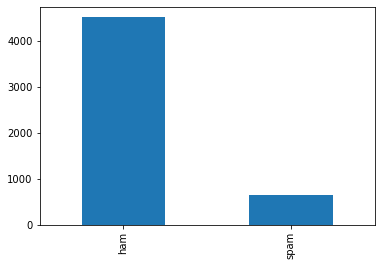

In [13]:
df['target'].value_counts().plot(kind='bar')

In [14]:
def preprocess_text(text):
    text = text.strip().lower()
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', text)
    text = re.sub(r'\s\s+', ' ', text)
    text_tokens = word_tokenize(text)
    text_tokens = [text_token for text_token in text_tokens if text_token.isalpha()]
    text_tokens = [text_token.translate(str.maketrans('', '', string.punctuation)) for text_token in text_tokens]
    stemmer = PorterStemmer()
    text_tokens = [stemmer.stem(text_token) for text_token in text_tokens if not text_token in set(stopwords.words('english'))]
    text = ' '.join(text_tokens)
    return text

In [15]:
df['clean_text'] = df['text'].apply(preprocess_text)

In [16]:
df.head()

,target,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt may ...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [17]:
cv = CountVectorizer()
X = cv.fit_transform(df['clean_text']).toarray()

In [18]:
label_encoder = LabelEncoder().fit(df['target'])
y = label_encoder.transform(df['target'])
label_encoder.classes_

array(['ham', 'spam'], dtype=object)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.3, stratify=y)

In [20]:
clf = MultinomialNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.980176,0.985136,0.982650,3162.000000
1,0.891455,0.859688,0.875283,449.000000
accuracy,0.969538,0.969538,0.969538,0.969538
macro avg,0.935816,0.922412,0.928967,3611.000000
weighted avg,0.969144,0.969538,0.969300,3611.000000


In [21]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.968914,0.995572,0.982062,3162.000000
1,0.961326,0.775056,0.858200,449.000000
accuracy,0.968153,0.968153,0.968153,0.968153
macro avg,0.965120,0.885314,0.920131,3611.000000
weighted avg,0.967970,0.968153,0.966661,3611.000000


In [22]:
# !pip install tensorflow
# !pip install tensorflow-text

In [ ]:
import tensorflow.keras.models as Sequential, load_model
from tensorflow.keras.layers import Dense